## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## File reading

In [2]:
data_files = []

In [3]:
data_files.clear()
for i in range(2,9):
    data_files.append(pd.read_csv(f'./dataset/hb200{i}.csv'))
print(f'We have total {len(data_files)} files for data analysis of hospital beds in UAE states')

We have total 7 files for data analysis of hospital beds in UAE states


## Information about dataset

In [4]:
total_rows, total_cols = 0, 0
for fi in data_files:
    total_rows += fi.shape[0]
    
print(f'The dataset contain {total_rows} Rows and {data_files[0].shape[1]} Columns')

The dataset contain 5713 Rows and 8 Columns


In [5]:
print('The following columns are for the anaysis of data:')
for c_name in list(data_files[0].columns):
    print(c_name)

The following columns are for the anaysis of data:
Year
Region_AR
Region_EN
Hospital_AR
Hospital_EN
Speciality_AR
Speciality_EN
Beds


## Preprocessing

In [6]:
# remove additional columns and keep only cols of interest
useful_col_names = ['Year', 'Region_EN', 'Hospital_EN', 'Speciality_EN', 'Beds']

In [7]:
df_usefuls = []
for dfi in data_files:
    df_usefuls.append(dfi[useful_col_names])

In [8]:
df_usefuls[2]['Year'] = df_usefuls[2]['Year'] + 1

/home/sibti/anaconda3/envs/a1_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
# combine all dataframes
df = pd.concat(df_usefuls)

In [10]:
# change year column to date format values
df['Year'] =  pd.to_datetime(df['Year'], format='%Y')

In [11]:
# remove null values
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(5682, 5)

In [12]:
# convert beds to integers after removing commas from string
df['Beds'] = df['Beds'].replace(',','', regex=True)
df['Beds'] = pd.to_numeric(df['Beds'], downcast='float')

In [13]:
# remove all columns containg total word, so they are not able to cause problem in our analysis
df = df[df.Region_EN != 'Total']
df = df[df.Hospital_EN != 'Total']
df = df[df.Speciality_EN != 'Total']
df.shape

(4060, 5)

After all of this preprocessing we have now **4060** rows and **5** columns to perform our analysis

## Data Analysis

In [167]:
df.head()

,Year,Region_EN,Hospital_EN,Speciality_EN,Beds
0,2002-01-01,Abu Dhabi,Marfraq,Internal Medicine,30.0
1,2002-01-01,Abu Dhabi,Marfraq,Pulmonology,0.0
2,2002-01-01,Abu Dhabi,Marfraq,Cardiology,27.0
3,2002-01-01,Abu Dhabi,Marfraq,Neurology,7.0
4,2002-01-01,Abu Dhabi,Marfraq,Psychiatry,0.0


In [15]:
unique_regions, unique_hospitals, unique_specs = df.Region_EN.unique(), df.Hospital_EN.unique(), df.Speciality_EN.unique()
print(f'Total unique regions {len(unique_regions)}')
print(f'Total unique hospitals {len(unique_hospitals)}')
print(f'Total unique specialities {len(unique_specs)}')

Total unique regions 9
Total unique hospitals 40
Total unique specialities 34


### Question 1. Which hospital has most beds & in which year?

In [16]:
# sort values to see the details of data items having most beds
most_beds_dataitem = df.sort_values(by ='Beds', ascending=False).iloc[0]
print(f'{most_beds_dataitem.Hospital_EN} Hospital in {most_beds_dataitem.Region_EN} has most beds, which are almost {most_beds_dataitem.Beds}'
f' for the Speciality of {most_beds_dataitem.Speciality_EN}.')

Central Hospital in Abu Dhabi has most beds, which are almost 165.0 for the Speciality of General Medicine.


Ans No.1. **Central Hospital** in **Abu Dhabi** has most beds, which are almost **165.0** for the Speciality of **General Medicine**.

<hr>

### Question 2. Show trends in number of beds for general medicine per year using line chart?

In [17]:
# Number of beds for general medicine per year
gm_beds = df[df.Speciality_EN == 'General Medicine'].groupby('Year').sum()

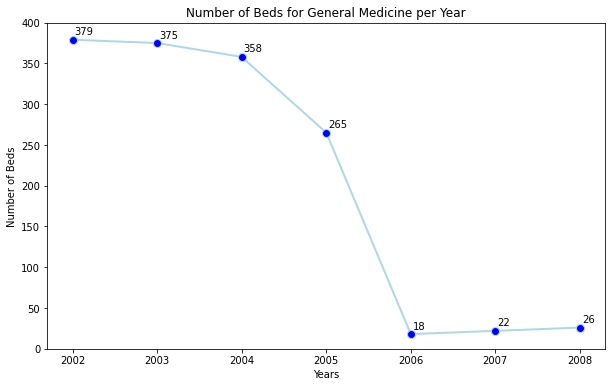

In [18]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
plt.title('Number of Beds for General Medicine per Year')
plt.ylim(0, 400)
plt.plot(gm_beds.index, gm_beds.values,
         '-ok', color='lightblue',
         markersize=8, linewidth=2,
         markerfacecolor='blue',)
plt.xlabel('Years')
plt.ylabel('Number of Beds')
for i,j in zip(gm_beds.index, gm_beds.values):
    ax.annotate(str(int(j)),xy=(i,j), xytext=(2,5), textcoords='offset points')
plt.show()

Ans No.2. Trend in **Beds Quantity for General Medicine** is given in above **Line Plot**.

<hr>

### Question 3. What is the average number of beds per year and its spread?

In [19]:
beds_per_year = df.groupby('Year').sum().values
beds_mean = np.mean(beds_per_year)
beds_std = np.std(beds_per_year)
beds_mean, beds_std

(3227.8572, 918.4133)

Ans No.3. The average beds in hospitals of UAE are calculated as **3229** with a spread of ± **918** beds

<hr>

### Question 4. Show the distribution of beds among regions in 2005 using pie chart?

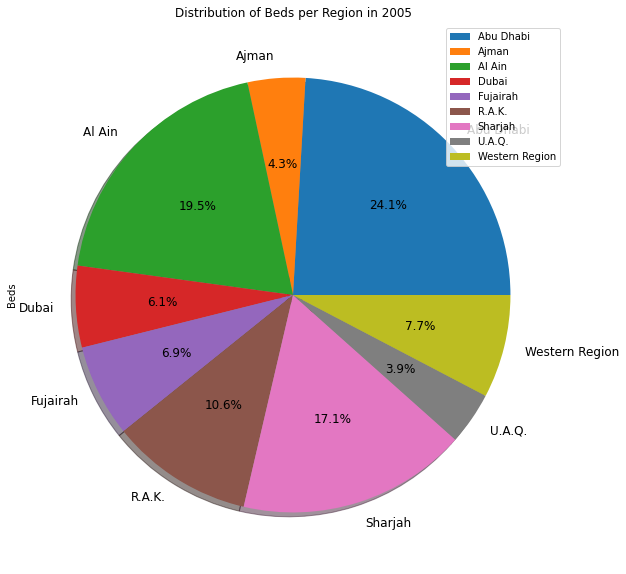

In [20]:
df_rb_y5 = df[df.Year == '2005']
df_rb_y5 = df_rb_y5.groupby('Region_EN')
df_rb_y5 = df_rb_y5.sum()
df_rb_y5.plot.pie(y='Beds',
                  figsize=(10, 10),
                  title='Distribution of Beds per Region in 2005',
                  autopct='%1.1f%%',
                 shadow=True,
                 fontsize=12,)
                 #explode=(0.2, 0, 0.1, 0, 0, 0.1, 0, 0, 0))
plt.show()

Ans No.4. Distribution of **Beds Quantity** by **Regions** is given in above **Pie Chart**.

<hr>

### Question 5. Number of Specialities with respect to Regions of UAE using Bar plot?

In [21]:
df_reg_specs = df.groupby(['Region_EN'])
df_reg_specs = df_reg_specs['Speciality_EN']
df_reg_specs = df_reg_specs.unique()
df_reg_specs = df_reg_specs.apply(lambda x: len(x))

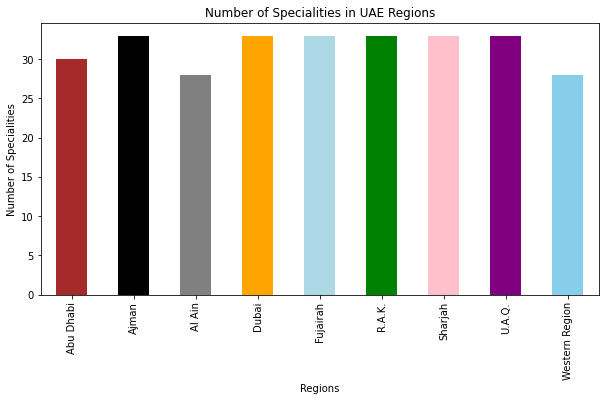

In [22]:
# xik = pd.DataFrame(xik)
df_reg_specs.plot(kind='bar',
        figsize=(10, 5),
        xlabel='Regions',
        ylabel='Number of Specialities',
        title='Number of Specialities in UAE Regions',
        color=['brown', 'black', 'gray', 'orange', 'lightblue', 'green', 'pink', 'purple', 'skyblue'])
plt.show()

Ans No.5. **Number of Specialities** in **Regions** of UAE using **Bar Plot**.

<hr>

### Question 6. What is the highest change for Beds against Region in 2002-2008?

In [160]:
df_reg_bed_c = df.groupby(['Year', 'Region_EN'])
df_reg_bed_c = df_reg_bed_c.sum()

In [161]:
def create_joined_df(df, years=['2','3','4','5','6','7','8']):
    dframes = list()
    year_idx = df_reg_bed_c.index.get_level_values(0)
    for y in years:
        cond = (l0 == f"200{y}")
        di = df_reg_bed_c[cond]
        di.columns = [f'Beds_200{y}']
        di.index = di.index.get_level_values(1)
        di = di.reset_index()
        dframes.append(di)
    new_df = dframes[0]
    for dfi in dframes[1:]:
        new_df = pd.merge(new_df, dfi, on='Region_EN', how='outer')
    return new_df

In [162]:
df_reg_bed_c = create_joined_df(df_reg_bed_c)
df_reg_bed_c = df_reg_bed_c.set_index('Region_EN').T
df_reg_bed_c

Region_EN,Abu Dhabi,Ajman,Al Ain,Dubai,Fujairah,R.A.K.,Sharjah,Western Region,U.A.Q.
Beds_2002,1192.0,194.0,484.0,259.0,294.0,433.0,765.0,316.0,NaN
Beds_2003,1191.0,194.0,484.0,259.0,294.0,436.0,763.0,328.0,NaN
Beds_2004,1168.0,194.0,484.0,259.0,294.0,438.0,743.0,328.0,NaN
Beds_2005,1029.0,183.0,832.0,259.0,294.0,452.0,729.0,328.0,167.0
Beds_2006,NaN,167.0,NaN,259.0,386.0,698.0,735.0,NaN,NaN
Beds_2007,NaN,183.0,NaN,258.0,315.0,480.0,731.0,NaN,165.0
Beds_2008,NaN,109.0,NaN,254.0,393.0,432.0,737.0,NaN,226.0


In [164]:
abudhabi_std = df_reg_bed_c['Abu Dhabi'].std()
ajmnn_std = df_reg_bed_c['Ajman'].std()
alain_std = df_reg_bed_c['Al Ain'].std()
dubai_std = df_reg_bed_c['Dubai'].std()
fujairah_std = df_reg_bed_c['Fujairah'].std()
rak_std = df_reg_bed_c['R.A.K.'].std()
sharjah_std = df_reg_bed_c['Sharjah'].std()
westernr_std = df_reg_bed_c['Western Region'].std()
uaq_std = df_reg_bed_c['U.A.Q.'].std()

Ans No.6. The change of beds in 7 years (2002-2008) per region (ignoring the missing values) is following: 
* **Abu Dhabi** is **78**
* **Ajman** is **31**
* **Al Ain** is **174**
* **Dubai** is **2**
* **Fujairah** is **25**
* **R.A.K** is **97**
* **Sharjah** is **15**
* **Western Region** is **6**
* **U.A.Q** is **35**

<hr>

### Question No.7 What is the number of hospitals in each region of U.A.E for 2002-2008?

In [196]:
df_reg_hospital = df.groupby(['Region_EN'])
df_reg_hospital = df_reg_hospital['Hospital_EN']
df_reg_hospital = df_reg_hospital.unique()
df_reg_hospital = df_reg_hospital.apply(lambda x: len(x))
# df_reg_hospital

Ans No.7. The number of hospitals till 2008 per region of UAE are following: 
* **Abu Dhabi** is **7**
* **Ajman** is **2**
* **Al Ain** is **4**
* **Dubai** is **4**
* **Fujairah** is **2**
* **R.A.K** is **7**
* **Sharjah** is **8**
* **Western Region** is **1**
* **U.A.Q** is **5**

<hr>